In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Default.csv')
df.head(5)

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


Here balance refers to outstanding balance i.e., how much loan is left to be pay back.

In [ ]:
df.shape

(10000, 4)

In [ ]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374877,33516.981852
std,483.714957,13336.639582
min,0.000000,771.970000
25%,481.732500,21340.460000
50%,823.635000,34552.645000
75%,1166.305000,43807.730000
max,2654.320000,73554.230000


Box plot is made to understand the distribution of numerical columns i.e, of 'balance' and 'income' column.

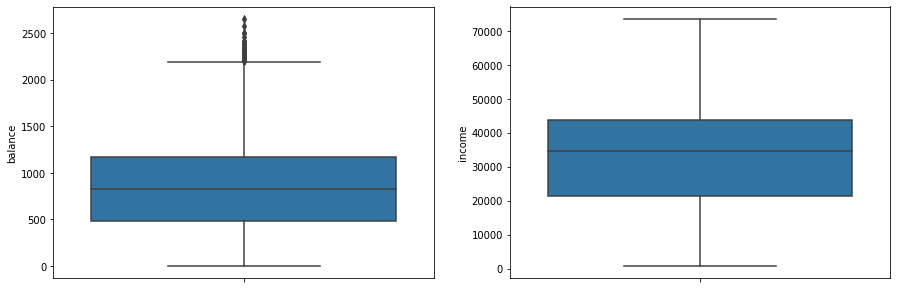

In [ ]:
plt.figure(figsize=(15,5)) #figure size
# Here ploting 2 boxlots for both balance and income
#subplot since making 2 plots
plt.subplot(1,2,1)  #(1 row, 2 columns, index)
sns.boxplot(y = df['balance'])

plt.subplot(1,2,2)
sns.boxplot(y=df['income'])
plt.show()

Now to understand the distribution of categorical columns i.e., 'default' and 'students' column, we will make count plot.

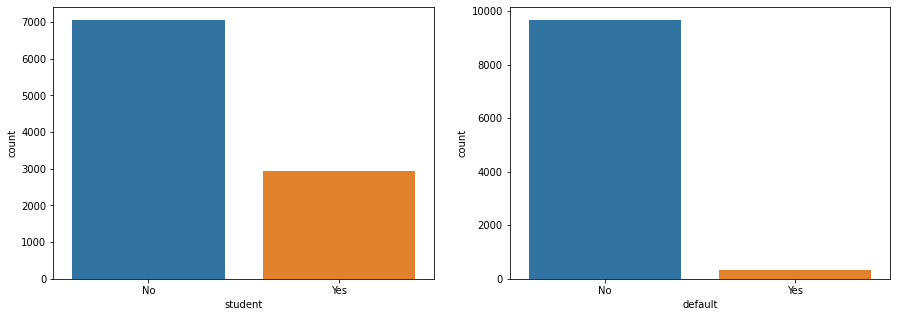

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df['student'])

plt.subplot(1,2,2)
sns.countplot(df['default'])
plt.show()

So from here it seems that from 10000 about 7000 are not students and around 9500 are not gonna default and pay back there loans.

But to know the exact values:-

In [ ]:
df['student'].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [ ]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

To get these valus in percentages:-

In [ ]:
df['student'].value_counts(normalize=True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [ ]:
df['default'].value_counts(normalize=True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

Now making boxplot between numerical column and categorical column. Previously it was just with 1 column.

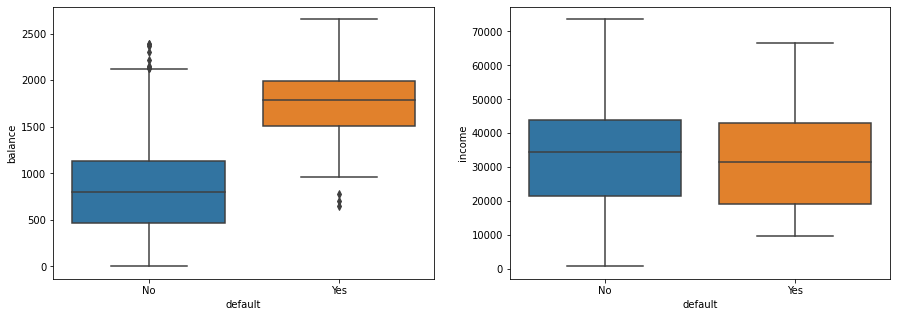

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1) 
sns.boxplot(df['default'], df['balance'])

plt.subplot(1,2,2)
sns.boxplot(df['default'], df['income'])
plt.show()

In [ ]:
pd.crosstab(df['student'], df['default'], normalize='index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


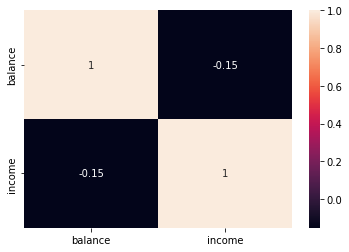

In [ ]:
sns.heatmap(df[['balance', 'income']].corr(), annot=True)
plt.show()

Hence we don't any conclusive correlation between balance and income of certain people

In [ ]:
df.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

Tyding up the outliers.

In [ ]:
Q1, Q3= df['balance'].quantile([.25, .75]) #  Q1 & Q3 are 1st & 3rd quartile i.e, 25% & 75%
IQR = Q3 - Q1 #Inter Quartile Range
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR) 

In [ ]:
UL

2193.16375

Creating another object where all the values of balance that are greater than Upper limit that is going to be stored in this object(df1).

In [ ]:
df1 = df[df['balance'] > UL]

In [ ]:
df1

,default,student,balance,income
173,Yes,Yes,2205.80,14271.49
1136,Yes,No,2499.02,51504.29
1160,Yes,Yes,2502.68,14947.52
1359,Yes,No,2220.97,40725.10
1502,Yes,Yes,2332.88,11770.23
1609,Yes,Yes,2269.95,18021.11
2096,Yes,Yes,2261.85,20030.17
2140,No,Yes,2308.89,19110.27
2929,Yes,Yes,2387.31,28296.91
3162,Yes,Yes,2415.32,17429.50


So to find out how many outliers do we really have.

In [ ]:
df1['default'].count()

31

Now since 31 is a big no. compared to 333 total default values i.e, around 10%, hence we can't completely remove them. Hence we would try to reduce its value and try to bring close to upper limit value.

In [ ]:
df1['default'].value_counts(normalize = True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

Hence we can see that 83% of them were defaulters.

To know the exact value:-

In [ ]:
df1['default'].value_counts()

Yes    26
No      5
Name: default, dtype: int64

In [ ]:
import numpy as np
df['balance'] = np.where(df['balance'] > UL, UL, df['balance'])

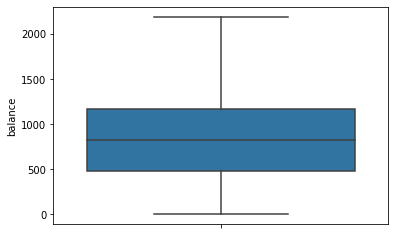

In [ ]:
sns.boxplot(y= df['balance'])
plt.show()

In [ ]:
df = pd.get_dummies(df, drop_first = True)

In [ ]:
df.head()

,balance,income,default_Yes,student_Yes
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0


In [ ]:
df.columns = ['balance', 'income', 'default', 'student']
df.head(5)

,balance,income,default,student
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('default', axis=1)
y = df['default']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y)
print(X_train.shape)
print(X_test.shape)

(7000, 3)
(3000, 3)


In [ ]:
print(y_train.value_counts(normalize = True).round(2))
print(' ')
print(y_test.value_counts(normalize = True).round(2))

0    0.97
1    0.03
Name: default, dtype: float64
 
0    0.97
1    0.03
Name: default, dtype: float64


In [ ]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33, sampling_strategy = 0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_res,y_res)

LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[2589,  311],
       [  25,   75]])